# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [36]:
# Your code here
mu, sigma = 50, 5
samples = {i:{"sample":np.random.normal(mu,sigma,siz)} for i, siz in enumerate([10,50,500,5000])}
print(samples[0])
for value in samples.values():
    value["statistic"], value["p"] = scipy.stats.normaltest(value["sample"])
    print("Statistic: ", value["statistic"])
    print("P value: ", value["p"])

    

{'sample': array([52.1951455 , 42.9726168 , 51.51677168, 48.50151324, 51.0092178 ,
       65.03797391, 47.67909861, 52.103258  , 48.8705273 , 49.15926892])}
Statistic:  12.173220175288417
P value:  0.002273101483686105
Statistic:  0.9002118264563538
P value:  0.6375606219420649
Statistic:  2.640445606310022
P value:  0.26707579000772974
Statistic:  4.652060761895308
P value:  0.09768274174338282


#### Interpret the normaltest results and make your observations.

We can define a predefines significance level for the p-value and set it in the 1% significance. That means that for p-values > 0.01 we can't reject the null hypothesis

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

<ipython-input-34-21e79d5b1ff5>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


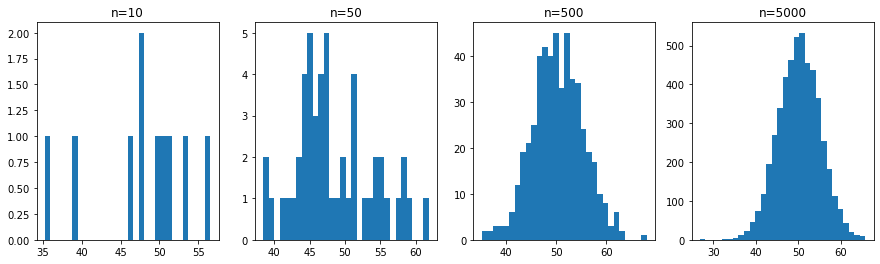

In [34]:
# Your code here
figure,ax=plt.subplots(1,4,figsize=(15,4))
for i,value in enumerate(samples.values()):
    header = len(value["sample"])
    ax[i].set_title(f"n={header}")
    ax[i].hist(value["sample"],bins=30)
figure.show()

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

The higher the n amount of occurences the more the graph resembles a normal distribution

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

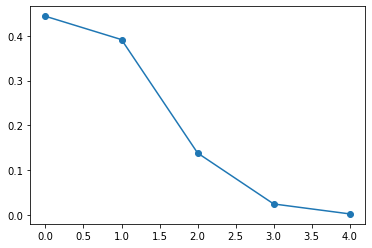

In [65]:
# Your code here
n = 5
p = 0.15
x = range(5)
plt.plot(x, scipy.stats.binom.pmf(x, n, p), '-o')

#### Explain what you observe from the plot above

The probability that each subsequent person clicked on the ad lowers when you try to include more people. Therefore the chance that 4 of them clicked the ad is close to 0

#### Now plot PMP with 50, 500, and 5000 visitors.

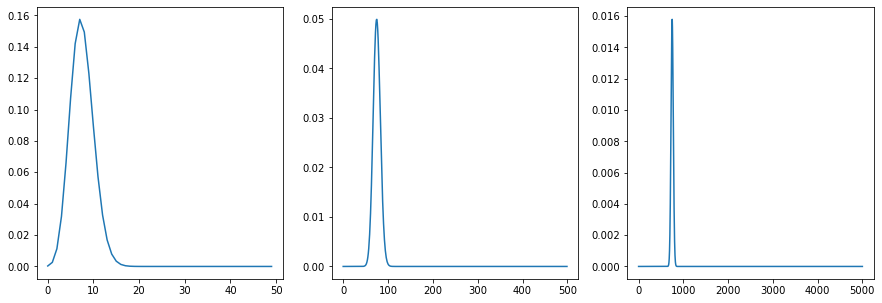

In [68]:
# Your code here
fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.sca(axes[0])
plt.plot(range(50), scipy.stats.binom.pmf(range(50), 50, .15))
plt.sca(axes[1])
plt.plot(range(500), scipy.stats.binom.pmf(range(500), 500, .15))
plt.sca(axes[2])
plt.plot(range(5000), scipy.stats.binom.pmf(range(5000), 5000, .15))

#### What did you notice from the distribution plots? Comment your findings.

There is a max point in the distribution in which adding more n ocurrences won't yield better results

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

Probability that a determined number of events over a certain period of time based on average frequency of ocurrence.


In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [69]:
# Your code here
mu = 300
scipy.stats.poisson.pmf(320,mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [70]:
# Your code here
scipy.stats.poisson.pmf(60, mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

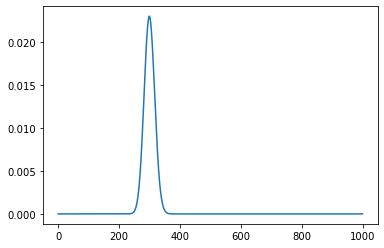

In [76]:
# your code here
plt.plot((range(1001)), scipy.stats.poisson.pmf(range(1001), mu), '-')